<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Part3.1_Binary_Classification_Model_ipynX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to BinaryClassifiaction Model

### Problem :- Email Spam Detection
Here we are going to create a model that can predict the mail is a Spam(1)/Not a Spam(0), using the provided subject of the email.

In [15]:
# Modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Data Set

#### The dataset used in this example is sourced from Kaggle (original authors Almeida and Hidalgo, 2011) is provided below.
* [Spam test Dataset](https://www.kaggle.com/datasets/team-ai/spam-text-message-classification)



In [16]:
#Load Data
dataset = pd.read_csv('/content/drive/MyDrive/SPAMtextmessage.csv')
# Convert ham to 0 and spam to 1
dataset['Category']= dataset['Category'].str.replace('ham','0')
dataset['Category']= dataset['Category'].str.replace('spam','1')
dataset['Category']= dataset['Category'].astype(int)
sentences = dataset['Message'].tolist()
labels = dataset['Category'].tolist()
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)
# Sentence variables
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
# Labels variables
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


## Visualizing the Data Labels

As the is only 2 output in labels that is 0(Not Spam) and 1 (Spam) using a bar /pie chart is ideal for visualization.

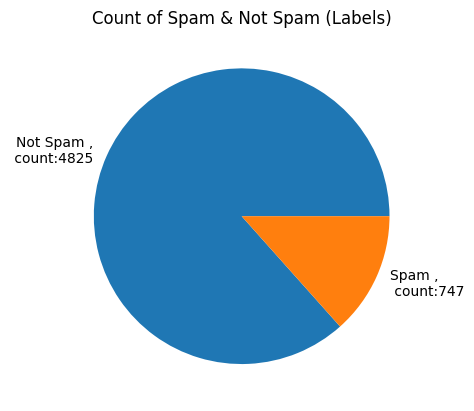

In [17]:
zero_count =int(labels.count(0))
one_count = int(len(labels))-zero_count
c = [zero_count,one_count]
plt.title('Count of Spam & Not Spam (Labels)')
plt.pie(c,labels=[f'Not Spam ,\n count:{zero_count}',f'Spam ,\n count:{one_count}'])
plt.show()

In [18]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [19]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type,
                       truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 20
history=model.fit(padded, training_labels_final, epochs=num_epochs,batch_size=128, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
35/35 [==============================] - 2s 21ms/step - loss: 0.4493 - accuracy: 0.8519 - val_loss: 0.3381 - val_accuracy: 0.8700
Epoch 2/20
35/35 [==============================] - 0s 11ms/step - loss: 0.2896 - accuracy: 0.8647 - val_loss: 0.2129 - val_accuracy: 0.8700
Epoch 3/20
35/35 [==============================] - 0s 11ms/step - loss: 0.1908 - accuracy: 0.8647 - val_loss: 0.1664 - val_accuracy: 0.8700
Epoch 4/20
35/35 [==============================] - 0s 8ms/step - loss: 0.1622 - accuracy: 0.8800 - val_loss: 0.1494 - val_accuracy: 0.9695
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss: 0.1459 - accuracy: 0.9702 - val_loss: 0.1388 - val_accuracy: 0.9722
Epoch 6/20
35/35 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.9746 - val_loss: 0.1322 - val_accuracy: 0.9767
Epoch 7/20
35/35 [==============================] - 0s 6ms/step - loss: 0.1266 - accuracy: 0.9805 - val_loss: 0.1275 - val_accuracy: 0.9785
Epoch 8/20
35/35 

In [32]:
model.evaluate(testing_padded,testing_labels_final)
model_testpredition = model.predict(testing_padded,batch_size=128)
print(model_testpredition[3])
testing_padded[3]
print(testing_sentences[3])
print(testing_labels_final[3])

9/9 [==============================] - 0s 2ms/step
[0.9988023]
Welcome to UK-mobile-date this msg is FREE giving you free calling to 08719839835. Future mgs billed at 150p daily. To cancel send "go stop" to 89123
1


<Axes: >

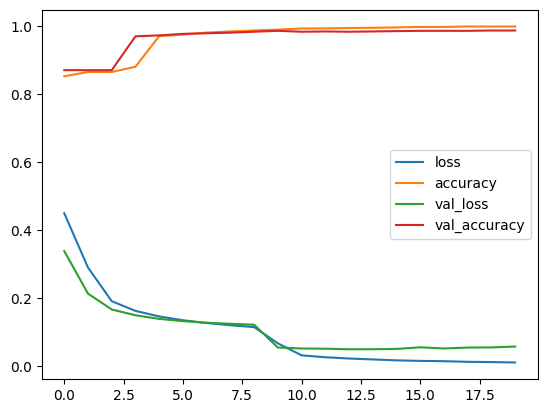

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
# Optimal learning rate.
model2= tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
# Compile
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Learning rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
# fitting
hist=model2.fit(padded,training_labels_final,epochs=100,callbacks=[lr_schedular],batch_size=500,validation_data=(testing_padded,testing_labels_final))

Epoch 1/100
9/9 [==============================] - 1s 43ms/step - loss: 0.5890 - accuracy: 0.8649 - val_loss: 0.4658 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.4498 - accuracy: 0.8649 - val_loss: 0.4087 - val_accuracy: 0.8700 - lr: 1.1220e-04
Epoch 3/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4083 - accuracy: 0.8649 - val_loss: 0.3842 - val_accuracy: 0.8700 - lr: 1.2589e-04
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 0.3909 - accuracy: 0.8649 - val_loss: 0.3738 - val_accuracy: 0.8700 - lr: 1.4125e-04
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3805 - accuracy: 0.8649 - val_loss: 0.3667 - val_accuracy: 0.8700 - lr: 1.5849e-04
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.3724 - accuracy: 0.8649 - val_loss: 0.3583 - val_accuracy: 0.8700 - lr: 1.7783e-04
Epoch 7/100
9/9 [==============================] - 0s 17ms

Text(0, 0.5, 'Learning Rate')

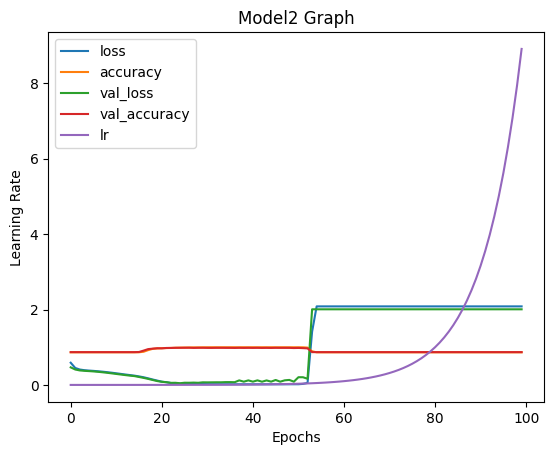

In [43]:

pd.DataFrame(hist.history).plot()
plt.title('Model2 Graph')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')

In [26]:
model2.evaluate(testing_padded,testing_labels_final)

35/35 [==============================] - 0s 8ms/step - loss: 2.0059 - accuracy: 0.8700


[2.0059351921081543, 0.8699551820755005]

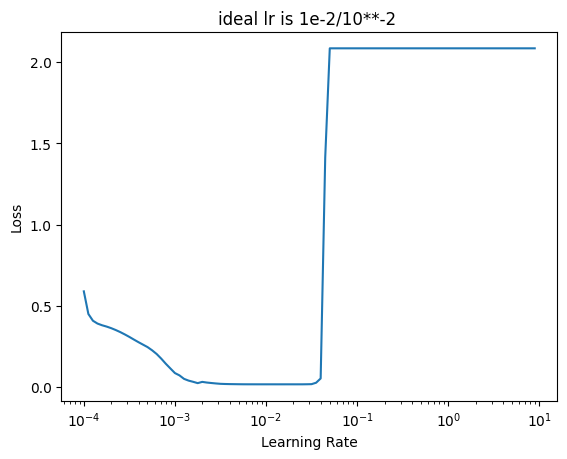

In [27]:
# plot loss vs lr
lr = 1e-4*(10**(tf.range(100)/20))
plt.semilogx(lr,hist.history['loss'])
plt.title('ideal lr is 1e-2/10**-2 ')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()


In [28]:

# Set lr = 0.01
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])

model3.compile(loss='binary_crossentropy',metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model3.fit(padded,training_labels_final,batch_size=128,epochs=100,
           validation_data=(testing_padded,testing_labels_final))


Epoch 1/100
35/35 [==============================] - 4s 33ms/step - loss: 0.2500 - accuracy: 0.8928 - val_loss: 0.1089 - val_accuracy: 0.9812
Epoch 2/100
35/35 [==============================] - 1s 20ms/step - loss: 0.0518 - accuracy: 0.9870 - val_loss: 0.0500 - val_accuracy: 0.9857
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0193 - accuracy: 0.9951 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 4/100
35/35 [==============================] - 0s 14ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.0623 - val_accuracy: 0.9857
Epoch 5/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0106 - accuracy: 0.9984 - val_loss: 0.0617 - val_accuracy: 0.9865
Epoch 6/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0666 - val_accuracy: 0.9857
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.1006 - val_accuracy: 0.9830
Epoch 

In [29]:
import random
ans=model3.predict(testing_padded,batch_size=128)
def Sample_Ans(num_sample=5):
  for i in range(num_sample):
    i=random.randrange(int(len(testing_padded)))
    print(f'''

      Prediction:{int(ans[i])},
      Sentence: {testing_sentences[i]},
      label:{testing_labels_final[i]}

        ''')


9/9 [==============================] - 0s 3ms/step


In [30]:
model3.evaluate(testing_padded,testing_labels_final)

35/35 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9749


[0.2555007040500641, 0.9748879075050354]

In [31]:
Sample_Ans()



      Prediction:0,
      Sentence: Don no da:)whats you plan?,
      label:0

        


      Prediction:0,
      Sentence: Ummmmmaah Many many happy returns of d day my dear sweet heart.. HAPPY BIRTHDAY dear,
      label:0

        


      Prediction:0,
      Sentence: Sorry i missed your call. Can you please call back.,
      label:0

        


      Prediction:0,
      Sentence: I bought the test yesterday. Its something that lets you know the exact day u ovulate.when will get 2u in about 2 to 3wks. But pls pls dont fret. I know u r worried. Pls relax. Also is there anything in ur past history u need to tell me?,
      label:0

        


      Prediction:0,
      Sentence: The guy at the car shop who was flirting with me got my phone number from the paperwork and called and texted me. I'm nervous because of course now he may have my address. Should i call his boss and tell him, knowing this may get him fired?,
      label:0

        
